# Notebook description

This notebook loads the AstroCLIP dataset released by the authors of the paper AstroCLIP and visualizes it.

# Load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.convolution import convolve, Gaussian1DKernel
from datasets import load_dataset

# Load the official, hugging face version of AstroCLIP dataset
astroclip_dataset_path = "../data/raw/AstroCLIP_dataset"

# Load the dataset
df_train = load_dataset(astroclip_dataset_path, split="train")
df_test = load_dataset(astroclip_dataset_path, split="test")

Resolving data files:   0%|          | 0/80 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [2]:
print(f"Num train samples: {len(df_train)}")
print(f"Num test samples: {len(df_test)}")
print(f"Total dataset size: {len(df_train)+len(df_test)}")
print(f"Num columns {len(df_train.column_names)}")
print(df_train.column_names)

Num train samples: 158377
Num test samples: 39599
Total dataset size: 197976
Num columns 4
['image', 'spectrum', 'redshift', 'targetid']


In [3]:
# Define the range of wavelengths measured by DESI spectra
start = 3600
end = 9824
step = 0.8

number_list = [x for x in range(int(start * 10), int(end * 10), int(step * 10))]
wavelength_domain = [x / 10 for x in number_list] + [end] # Converting back to original scale

print(len(wavelength_domain))

7781


# Visualize a few samples

In [4]:
def plot_galaxy(df, idx):
    image = df[idx]['image']
    targetid = df[idx]['targetid']
    image_array = np.array(image)

    # Now, extract RGB values into a flat structure first
    # Here we create a list of lists to gather RGB values
    rgb_values = []
    
    for row in image_array:
        # Each row is expected to be an array of shape (152,)
        rgb_row = [pixel for pixel in row]  # Each pixel is an array of shape (3,)
        rgb_values.append(rgb_row)
    
    # Convert to a numpy array
    rgb_values = np.array(rgb_values)
    normalized_image = np.clip(rgb_values, 0, None)  # Remove negatives
    normalized_image = normalized_image / np.max(normalized_image)  # Scale to [0, 1]
    
    # Convert to uint8 for proper visualization
    visual_image = (normalized_image * 255).astype(np.uint8)
    
    # Plot the image
    plt.title(f'Galaxy ID: {targetid}')  # Use targetid for identification
    plt.imshow(visual_image)
    plt.axis('off')  # Turn off axis
    plt.show()

In [5]:
def plot_spectrum(df, idx):
    # Extract spectrum and target ID
    spectrum = [x[0] for x in df[idx]['spectrum']]
    target_id = df[idx]["targetid"]

    # Create the convolved spectrum
    convolved_spectrum = convolve(spectrum, Gaussian1DKernel(5))

    # Set up Seaborn theme
    sns.set_theme(style="whitegrid", context="talk", palette="muted")

    # Initialize the figure
    plt.figure(figsize=(14, 6))  # Wider and taller for better visibility

    # Plot original spectrum
    sns.lineplot(
        x=wavelength_domain, 
        y=spectrum, 
        label='Original Spectrum', 
        color='blue', 
        linewidth=2.5
    )

    # Plot convolved spectrum
    sns.lineplot(
        x=wavelength_domain, 
        y=convolved_spectrum, 
        label='Smoothed Spectrum', 
        color='orange', 
        linestyle='--', 
        linewidth=2.5
    )

    # Add annotations and gridlines
    plt.title(f'Spectrum (ID: {target_id})', fontsize=18, fontweight='bold', pad=15)
    plt.xlabel('Wavelength [Angstrom]', fontsize=14, labelpad=10)
    plt.ylabel('Intensity', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title='Legend', title_fontsize=13)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Optional: Highlight zero line
    plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.8)

    # Show plot
    plt.tight_layout()
    plt.show()

    # Print Target ID for reference
    print(f"Spectrum Target ID: {target_id}")

# Visualize individual samples

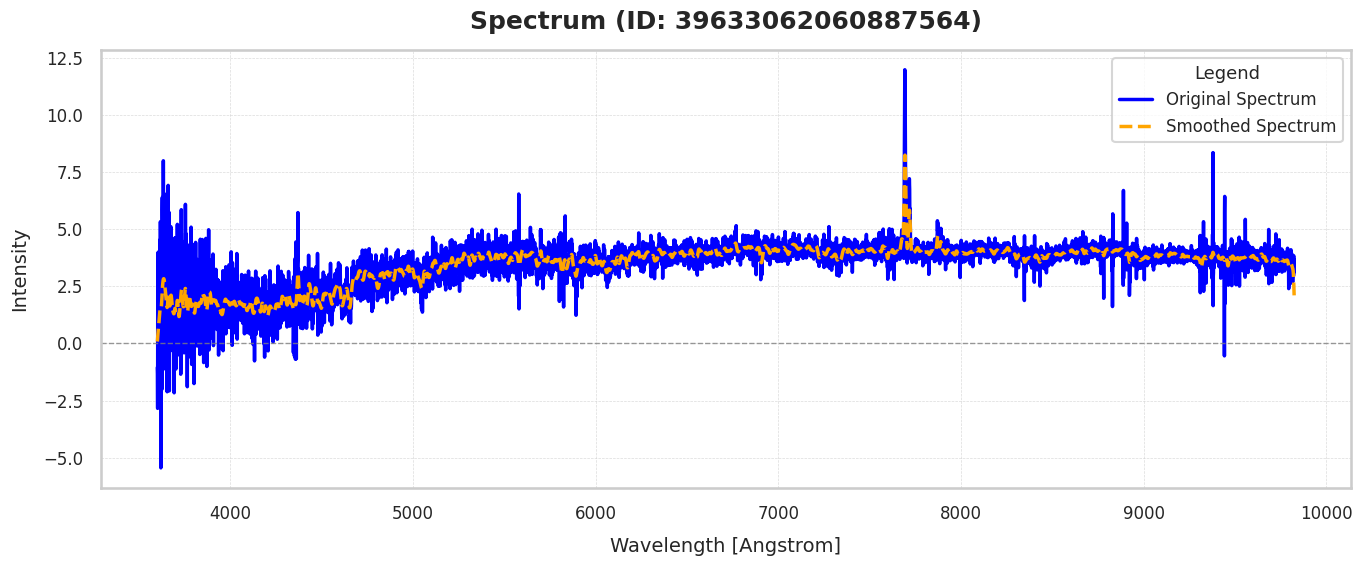

Spectrum Target ID: 39633062060887564


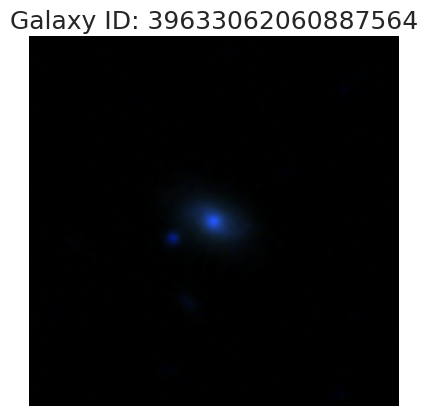

In [6]:
plot_spectrum(df_train,0)
plot_galaxy(df_train,0)

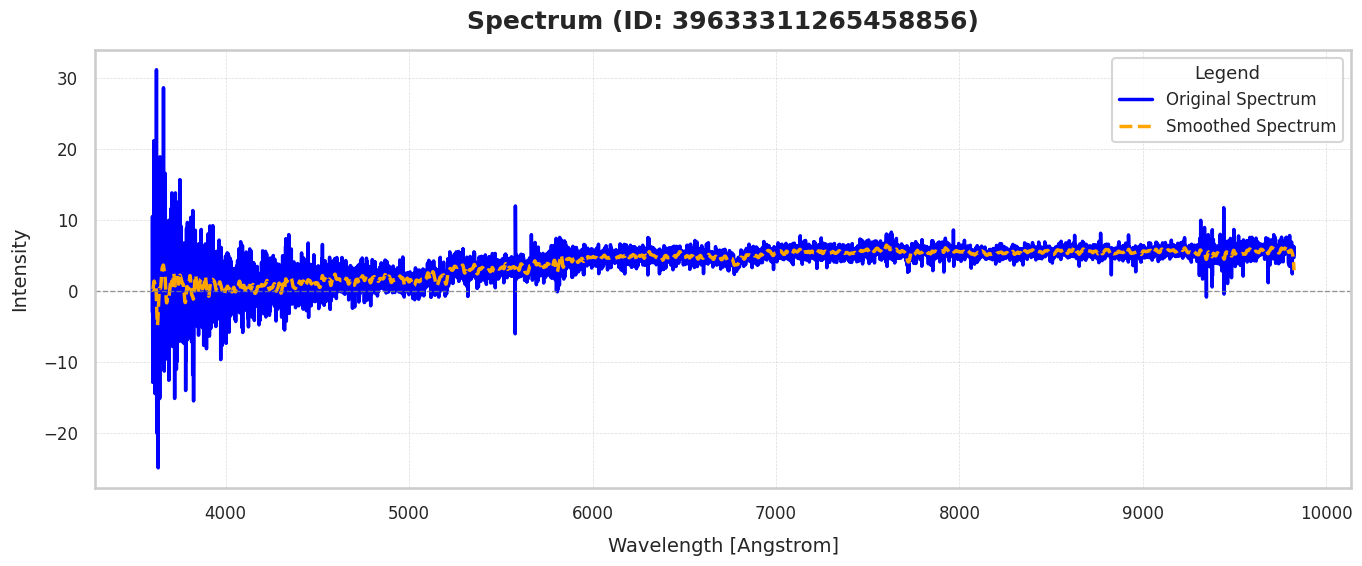

Spectrum Target ID: 39633311265458856


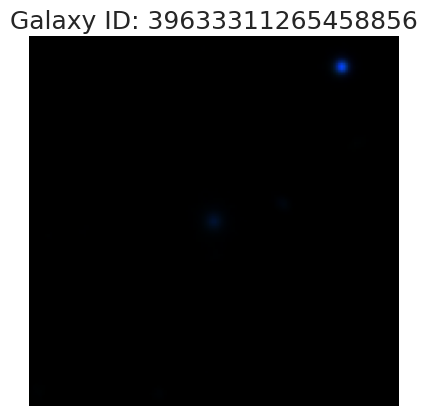

In [7]:
plot_spectrum(df_train,1020)
plot_galaxy(df_train,1020)

# Visualize aggregated stats of the dataset

In [8]:
train_redshift = df_train["redshift"]
test_redshift = df_test["redshift"]

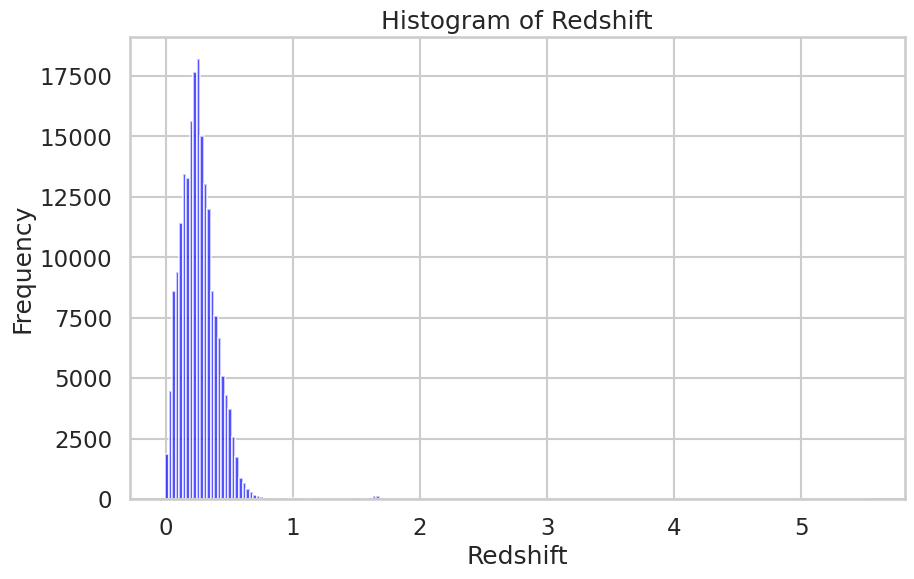

This histogram comes from  197976 samples


In [9]:
combined_redshifts = train_redshift + test_redshift

combined_redshifts_le1 = [ x for x in combined_redshifts if x <= 1 ]
combined_redshifts_ge1 = [ x for x in combined_redshifts if x > 1 ]

# Plot the histogram of redshifts
plt.figure(figsize=(10, 6))
plt.hist(combined_redshifts, bins=200, color='blue', alpha=0.7)
plt.title('Histogram of Redshift')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("This histogram comes from ", len(combined_redshifts), "samples")


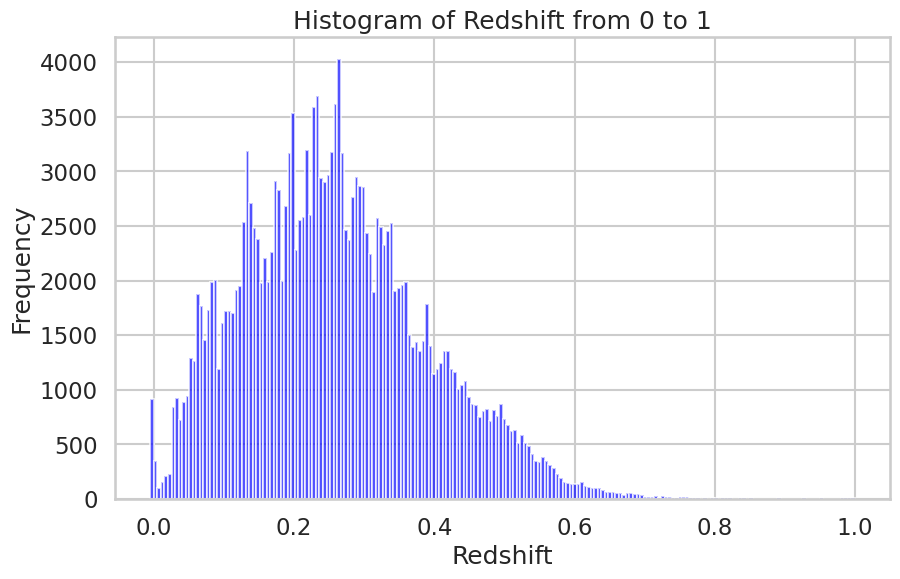

This histogram comes from  197164 samples


In [10]:
# Plot the histogram of redshifts
plt.figure(figsize=(10, 6))
plt.hist(combined_redshifts_le1, bins=200, color='blue', alpha=0.7)
plt.title('Histogram of Redshift from 0 to 1')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("This histogram comes from ", len(combined_redshifts_le1), "samples")


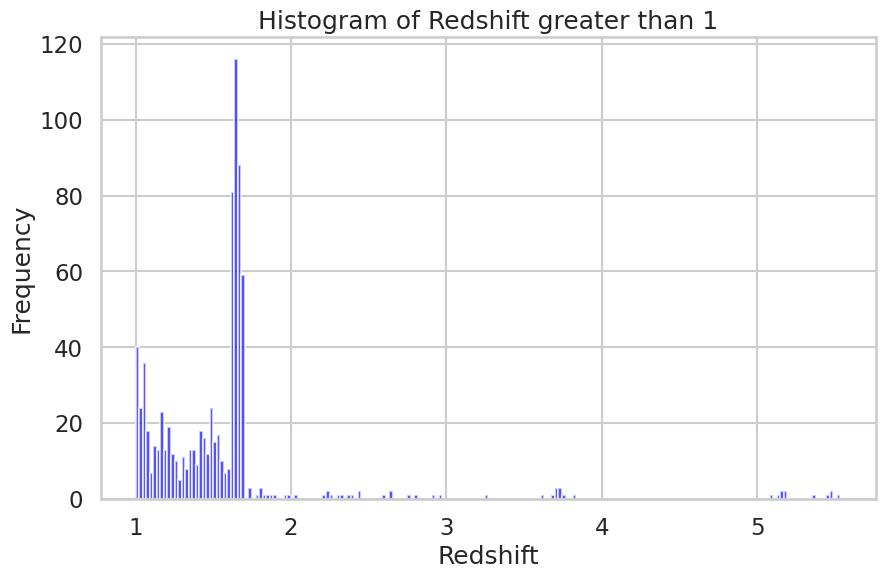

This histogram comes from  812 samples


In [11]:
# Plot the histogram of redshifts
plt.figure(figsize=(10, 6))
plt.hist(combined_redshifts_ge1, bins=200, color='blue', alpha=0.7)
plt.title('Histogram of Redshift greater than 1')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("This histogram comes from ", len(combined_redshifts_ge1), "samples")

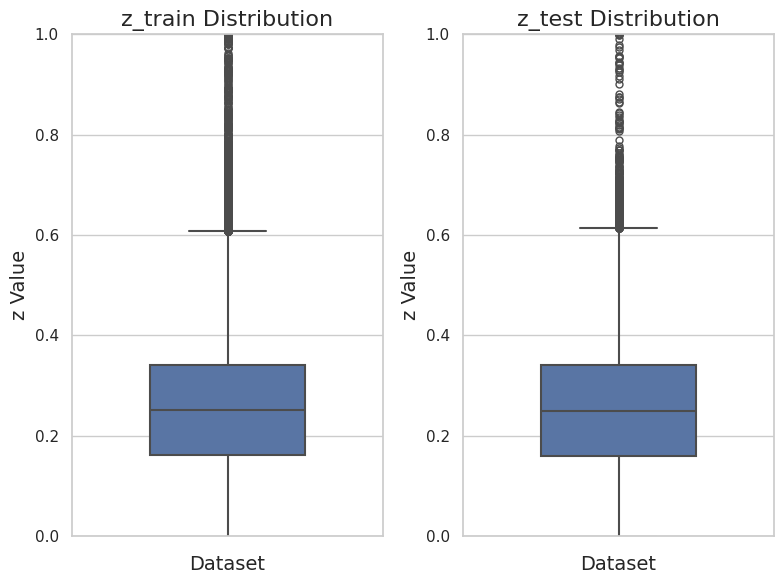

In [12]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(8, 6))

# Plot the boxplot for k_train
plt.subplot(1, 2, 1)
sns.boxplot(data=train_redshift, width=0.5, fliersize=5, linewidth=1.5)
plt.title('z_train Distribution', fontsize=16)
plt.ylabel('z Value', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis limits for k_train plot

# Plot the boxplot for k_test
plt.subplot(1, 2, 2)
sns.boxplot(data=test_redshift,  width=0.5, fliersize=5, linewidth=1.5)
plt.title('z_test Distribution', fontsize=16)
plt.ylabel('z Value', fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis limits for k_train plot

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
np.sum(np.array(df_train['redshift']) < 0) # For some reason there are 682 galaxies with negative redshift?!

682